# TP MATEMATICA III

## Para este TP elegí el dataset 'Datos.csv' porque era el que mas volumen de datos tenía y me parecía lo mas conveniente ya que queremos tener una buena muestra para que nuestro modelo de ML pueda predecir de la mejor manera.
## Con los datos obtenidos, voy a crear un modelo de ML que prediga la cantidad de Ventas que tiene una Marca, según la cantidad de publicidad que ponga en los distintos medios (Radio, Tv, Redes Sociales)

### Importo librerías que voy a utilizar

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Analisis exploratorio de datos

### Cargo los datos

In [3]:
data = pd.read_csv('C:/Users/ncarello/Desktop/Unsam.Clase.12.4.6.2021/cvs_para_el_TP/Data.csv')

data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


### Primera vista de los datos, veo algunas estadísticas

In [4]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


### Cambio nombre de columnas, para trabajar mas cómodo

In [5]:
data.rename(columns={'TV': 'tv', 'Radio': 'radio','Social Media':'social'},inplace=True)

### Cambio los valores de la columna Influencer a numeros

In [6]:
data.Influencer.replace(('Nano','Micro','Macro','Mega'),(1,2,3,4),inplace=True)


### Chequeo la cantidad de valores NaN que hay en el dataset

In [7]:
data.isna().sum()

tv            10
radio          4
social         6
Influencer     0
Sales          6
dtype: int64

### Reemplazo los NaN por los promedios según cada columna

In [8]:
# Radio
print('Promedio de horas de publicidad en Radio:', data.radio.mean())
data.radio.fillna(data.radio.mean(),inplace=True)

# TV
print('Promedio de horas de publicidad en TV:', data.tv.mean())
data.tv.fillna(data.tv.mean(),inplace=True)

# Redes
print('Promedio de horas de publicidad en Redes Sociales:', data.social.mean())
data.social.fillna(data.social.mean(),inplace=True)

# Ventas
print('Promedio de Ventas:', data.Sales.mean())
data.Sales.fillna(data.Sales.mean(),inplace=True)

data.isna().sum()


Promedio de horas de publicidad en Radio: 18.160355892662654
Promedio de horas de publicidad en TV: 54.06685664182376
Promedio de horas de publicidad en Redes Sociales: 3.323956161385458
Promedio de Ventas: 192.46660210662066


tv            0
radio         0
social        0
Influencer    0
Sales         0
dtype: int64

### Hago algunos graficos para ver algunas relaciones

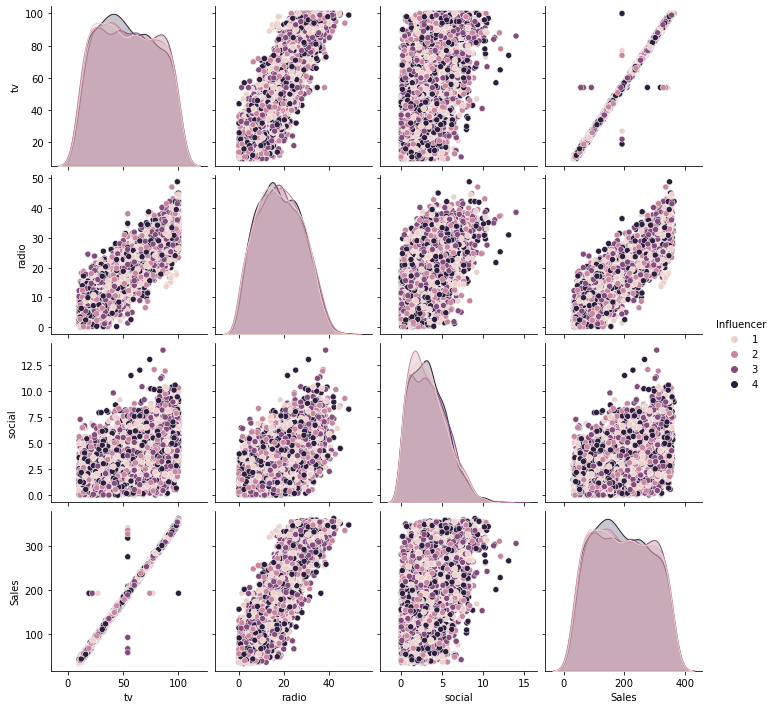

In [9]:
# PAIRPLOT

sns.pairplot(data,hue='Influencer')

### Veo la distribución de la variable Influencer

4    1158
2    1153
1    1139
3    1122
Name: Influencer, dtype: int64

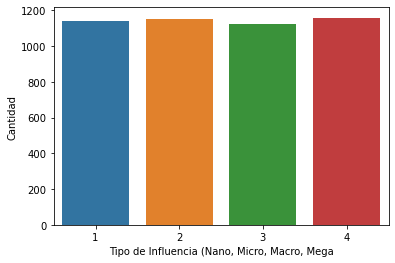

In [10]:

sns.countplot(x=data.Influencer)
plt.xlabel('Tipo de Influencia (Nano, Micro, Macro, Mega')
plt.ylabel('Cantidad')

data.Influencer.value_counts()


### Estudio la variable Ventas

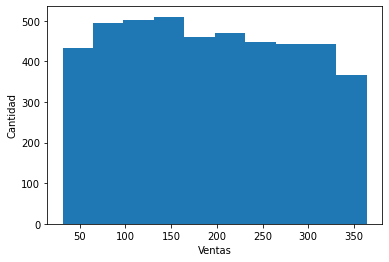

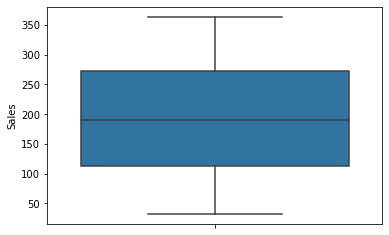

In [11]:
plt.hist(data.Sales)
plt.xlabel('Ventas')
plt.ylabel('Cantidad')
plt.show()


sns.boxplot(y=data.Sales)
plt.show()

### Podemos apreciar que tiene una distribucion bastante normal. Con un promedio cercano a 200 y el 50% de las ventas rondan entre los 120 y 270.
### Tiene una máxima apenas superior a los 350 y la minima un poco por debajo de los 50.

### Grafico de correlaciones entre las variables

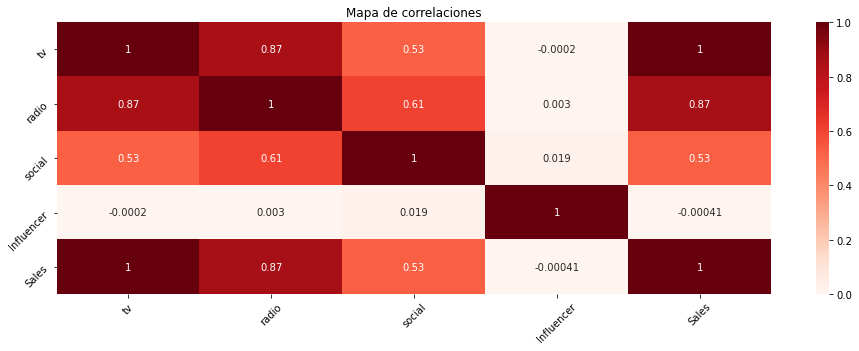

In [12]:
correlacion = data.corr()

plt.figure(figsize = (16,5))
sns.heatmap(correlacion, annot = True, cmap = 'Reds')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Mapa de correlaciones')
plt.show()

### Segun este gráfico muestra que las publicidades en TV tienen 100% correlacion con la cantidad de Ventas y la publicidad en Redes Sociales es la que menor correlacion tiene.

## MODELO MACHINE LEARNING

### Para este caso voy a utilizar una Regression Lineal para predecir la cantidad de Ventas

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Divido los conjuntos en Train y Test.
### Voy a hacer un 80/20 para tener una gran cantidad de muestras para entrenar bien el modelo y tambien tener varias para las pruebas.

In [28]:
X = data[['tv','radio','Influencer','social']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print('Accuracy del modelo:', lr.score(X_test,y_test))

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Raíz del error cuadrático medio en Train:', rmse_train)
print('Raíz del error cuadrático medio en Test:', rmse_test)

Accuracy del modelo: 0.9924414802312329
Raíz del error cuadrático medio en Train: 7.489755858843492
Raíz del error cuadrático medio en Test: 7.942567696092859


### Grafico los modelos Train y Test para compararlos

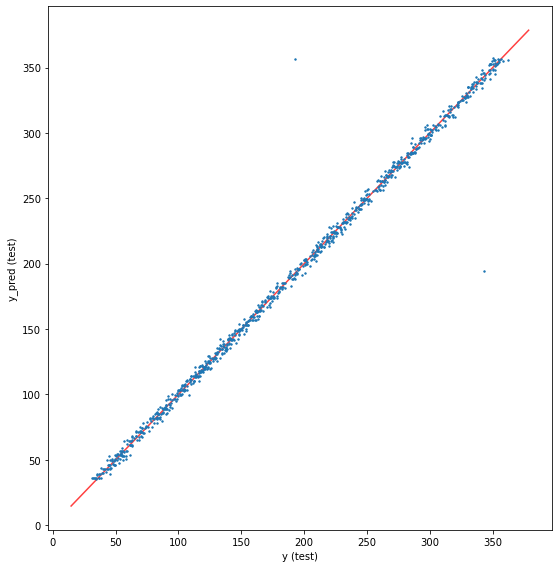

In [38]:
# TEST   
    
plt.figure(figsize = (15,8))

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,c='r')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

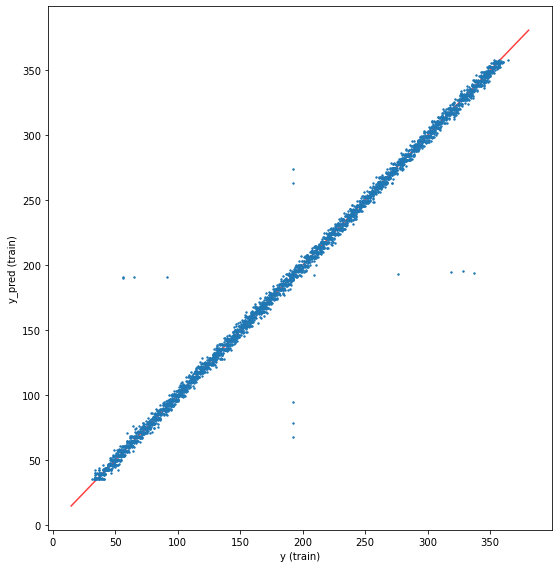

In [39]:
#TRAIN

plt.figure(figsize = (15,8))

ax = plt.subplot(1,2,2)
ax.scatter(y_train,y_train_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,c='r')
plt.xlabel('y (train)')
plt.ylabel('y_pred (train)')
    
plt.tight_layout()
plt.show()


### Viendo los gráficos tanto del modelo de Train como Test, ambos realizan una regresión que predice con bastante eexactitud las ventas segun la cantidad de publicidad en los distintos medios.
### Si bien el conjunto de Train tiene menor error que el de Test, la diferencia es mínima.

## Calculo de errores

In [43]:
print("Error Medio Absoluto (MAE):", mean_absolute_error(y_test, y_pred))
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Raíz del error cuadrático medio (RMSE) :", np.sqrt(mean_squared_error(y_test, y_pred)))

Error Medio Absoluto (MAE): 2.8270870269212427
Error cuadrático medio (MSE): 63.08438160701783
Raíz del error cuadrático medio (RMSE) : 7.942567696092859


# Conclusión

## Conseguimos armar un modelo de Regresion Lineal que logra predercir las ventas según la cantidad de publicidad que las marcas ponen en los distintos medios.